[Choosing Colormaps in Matplotlib - version 3.4.3](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [5]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

import seaborn as sns

%matplotlib inline

## Colormap 선정

### 2.1 Overview

고려해야 할 것<!-- 친절하시네요 -->

1. **표현의 대상**: 데이터의 형태인지, 수치인지
2. **데이터에 대한 지식**: 강조해야 하는 특정값 유무
3. **직관성**: 데이터를 직관적으로 전달하는 색 유무
4. **보편성**: 해당 분야에서 보편적으로 사용되는 색 유무

시각으로의 전달은 확실하고 직관적이다. 때문에 이를 이용하는 것이 시각화에 효과적이다. 이러한 이유로 colormap은 균일할수록 좋다.

인간의 색체 지각에 대한 연구

- *L<sup>\*</sup>* &nbsp;  Lightness (0: black, 100: white)
- *a<sup>\*</sup>* &nbsp;  Position between Magenta and Green (-: Green, +: Magenta)
- *b<sup>\*</sup>* &nbsp;  Position between Yellow and Blue (-: Blue, +: Yellow)

matplotlib는 이 중, *L<sup>\*</sup>* 를 채택하고 있다.

### 2.2 Colormap 종류

기능에 따른 기준

1. **Sequential**: 주로 밝기나 채도를 점진적으로 변화시키는 방식
  단일 색상을 사용하기도 하는데, (수치 등) 순서가 있는 데이터에 필수적
2. **Diverging**: Sequantial이 적용된 두 colormap을 중간값에서 무채색으로 연결.
  Pearson 상관계수처럼 중간값이 특별한 의미를 가질 때 사용
3. **Cyclic**: 둘 이상의 색상을 양 극단과 중간값 등에서 연결합니다.
  각도나 풍향, 시간처럼 주기성이 있는 데이터에 사용
4. **Qualitative**: 범주형(categorical) 데이터처럼 각각이 독립된 의미를 가질 때 이용

```
ex. 상관계수를 heatmap으로 보여줄 때
Sequential  -> 값이 비슷한 곳들을 비슷한 색으로 보여주어 grouping하기 쉽다.
Diverginng  -> 값이 0인 관련없는 변수를 찾기 쉽다.
Cyclic      -> 양의 방향으로 비례하는 변수와 음의 방향으로 비례하는 변수를 grouping하기 쉽다.
Qualitative -> 연속형 변수가 아닌, 특히 순서 자료가 아닌 것들을 시각화할 때 좋다.
```

In [ ]:
cmap = OrderedDict()

#### 2.2.1 Sequential

Lightness

- 대체로 단조증가
  - 선형이 아니다 = 곡선이 된다: 특정 영역 강조, 특정 영역이 뭉개짐을 의미
  - 따라서 흑백 인쇄물에서 데이터 왜곡이 일어날 수 있음.
- 0 ~ 100이지만, 일부는 20부터 시작

In [ ]:
cmap["Perceptually Uniform Sequential"] = [
    "viridis", "plasma", "inferno", "magma", "cividis"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_008.png" style="display: block; margin: auto;" alt="plotting하기 귀찮아서 그림만 가져왔는데, 안 보인다면 큰일 났구만." />

In [ ]:
cmap["Sequential"] = [
    "Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
    "YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu",
    "GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_009.png" style="display: block; margin: auto;" />

Sequential (2) 또한 대체로 단조증가 하지만, 일부(autumn, cool, spring, and winter)는 로그 함수처럼 증가폭이 바뀌는 부분이 있다.<br />
afmhot, copper, gist_heat, and hot은 중간에 줄 긋기에 실패한 것 같은 꺾임이 있다.

In [ ]:
cmap["Sequential (2)"] = [
    "binary", "gist_yarg", "gist_gray", "gray", "bone", "pink",
    "spring", "summer", "autumn", "winter", "cool", "Wistia",
    "hot", "afmhot", "gist_heat", "copper"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_010.png" style="display: block; margin: auto;" />

#### 2.2.2 Diverging

- Lightness가 100인 지점을 기준으로 두 개를 붙여놓았음.
- BrBG나 RdBu 추천

In [ ]:
cmap["Diverging"] = [
    "PiYG", "PRGn", "BrBG", "PuOr", "RdGy", "RdBu",
    "RdYlBu", "RdYlGn", "Spectral", "coolwarm", "bwr", "seismic"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_011.png" style="display: block; margin: auto;" />

#### 2.2.3 Cyclic

- 시작과 끝의 Lightness가 동일함.
- hsv의 경우, 색에 따라 Lightness가 오르락내리락하기 때문에 흑백 변환 금지

In [ ]:
cmap["Cyclic"] = ["twilight", "twilight_shifted", "hsv"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_012.png" style="display: block; margin: auto;" />

#### 2.2.4 Qualitative

- 범주형 데이터에 사용
- 어차피 색상이 달라서 변화를 이용하지 않음.
- 어차피 색이 중요한 범주형 데이터는 흑백으로 잘 변환하지 않지만, 색별로 Lightness 변화 정도가 달라서 흑백으로 변환해 쓰기 어려울 듯.

In [ ]:
cmap["Qualitative"] = [
    "Pastel1", "Pastel2", "Paired", "Accent",
    "Dark2", "Set1", "Set2", "Set3",
    "tab10", "tab20", "tab20b", "tab20c"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_013.png" style="display: block; margin: auto;" />

#### 2.2.5 Miscellaneous

- 특정 목적을 갖고 만들어진 colormap
- gist_earth, ocean, terrain: 지리정보시스템(GIS)에 사용
- CMRmap: 회색조로 변환될 것을 고려함.
- cubehelix: 밝기와 색상을 동시에 부드럽게 전환하기 위해 만들어짐.

In [ ]:
cmap["Miscellaneous"] = [
    "flag", "prism", "ocean", "gist_earth", "terrain", "gist_stern",
    "gnuplot", "gnuplot2", "CMRmap", "cubehelix", "brg", "gist_rainbow",
    "rainbow", "jet", "turbo", "nipy_spectral", "gist_ncar"]

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_014.png" style="display: block; margin: auto;" />

### 2.3 Color Vision Deficiencies

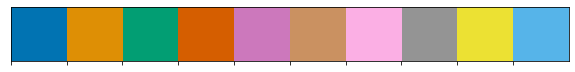

In [6]:
curr_palette = sns.color_palette("colorblind")
sns.palplot(curr_palette)

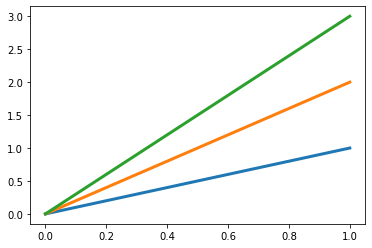

In [7]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], lw=3)
ax.plot([0, 1], [0, 2], lw=3)
ax.plot([0, 1], [0, 3], lw=3);